In [46]:
import pandas as pd
import numpy as np
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [47]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace = True)

In [48]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the Geography and Gender columns
geography_encoded = le.fit_transform(df['Geography'])
gender_encoded = le.fit_transform(df['Gender'])

# Replace the original columns with the encoded ones
df['Geography'] = geography_encoded
df['Gender'] = gender_encoded

In [49]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [50]:
from re import X
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Exited'])
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2,Gender_1
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [54]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [55]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [57]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim = 11))
model.add(Dense(1,activation='sigmoid'))

In [88]:
from keras.models import Sequential

# Assuming model is your Keras Sequential model
model = Sequential()

# Add layers to your model
model.add(Dense(64, activation='relu', input_shape=(100,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Get the number of layers
num_layers = len(model.layers)
print("Number of layers:", num_layers)

Number of layers: 3


In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [87]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 11ms/step - loss: 0.3463 - accuracy: 0.8586 - val_loss: 0.3595 - val_accuracy: 0.8556
Epoch 2/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3462 - accuracy: 0.8589 - val_loss: 0.3595 - val_accuracy: 0.8562
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3462 - accuracy: 0.8587 - val_loss: 0.3596 - val_accuracy: 0.8550
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8591 - val_loss: 0.3595 - val_accuracy: 0.8550
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8591 - val_loss: 0.3594 - val_accuracy: 0.8556
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8581 - val_loss: 0.3594 - val_accuracy: 0.8569
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8577 - val_loss: 0.3594 - val_accuracy: 0.855

In [89]:
model.layers[0].get_weights()

[array([[-0.14367767,  0.07254831,  0.02829555, ...,  0.109758  ,
          0.02863233, -0.18590531],
        [ 0.07515706,  0.12982897,  0.17311512, ..., -0.14606947,
         -0.03632587,  0.03658713],
        [ 0.07854103,  0.16172682, -0.05098338, ...,  0.16656889,
         -0.140847  , -0.11692889],
        ...,
        [-0.15843171,  0.16841759,  0.08278011, ...,  0.15339832,
          0.18445714, -0.09207167],
        [-0.17765854, -0.08938812, -0.17393465, ..., -0.02759536,
          0.13423158,  0.0782517 ],
        [ 0.1327941 ,  0.1488886 ,  0.17649324, ...,  0.10153694,
         -0.16688128,  0.12652706]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [82]:
model.layers[1].get_weights()

[array([[-3.8553934],
        [ 4.5420127],
        [-4.2530947]], dtype=float32),
 array([1.8326163], dtype=float32)]

In [83]:
y_log = model.predict(X_train_scaled)

250/250 [==============================] - 0s 1ms/step


In [84]:
y_pred = np.where(y_log>0.5,1,0)

In [85]:
y_pred_flattened = y_pred_flattened[:len(y_test_flattened)]

In [86]:
y_pred_flattened = y_pred.ravel()
y_test_flattened = y_test.ravel()

# Slice y_pred_flattened to match the length of y_test_flattened
y_pred_flattened = y_pred_flattened[:len(y_test_flattened)]

from sklearn.metrics import accuracy_score
accuracy_score(y_test_flattened, y_pred_flattened)

0.7195

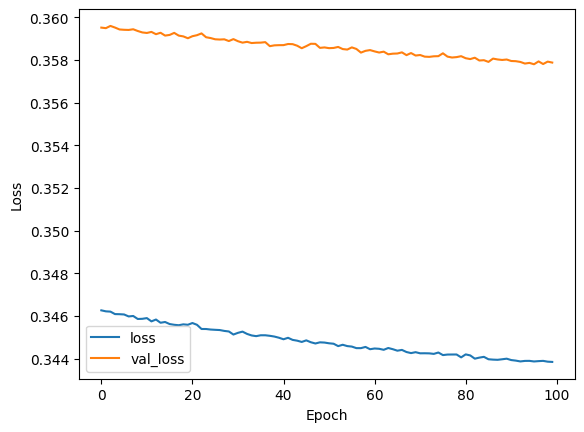

In [98]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label= 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

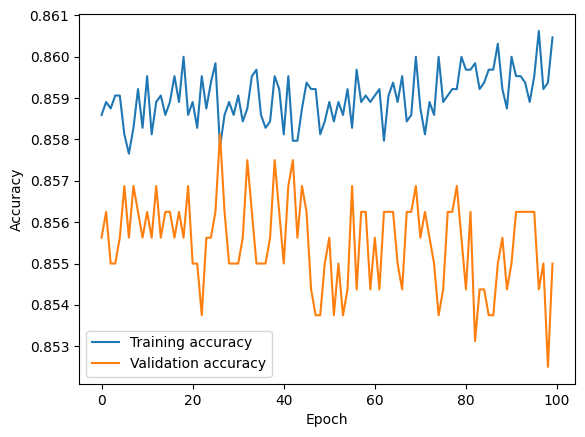

In [97]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()